# Veamos como anda el clustering

In [1]:
#Primero leemos los datos
dat <- read.table('clean_cat.dat', header = TRUE)
summary(dat)

       ra             dec                               Id            J        
 Min.   :176.1   Min.   :-64.66   VVV-J114419.03-603025.9:  1   Min.   :13.63  
 1st Qu.:178.2   1st Qu.:-64.30   VVV-J114428.39-603158.4:  1   1st Qu.:15.86  
 Median :205.1   Median :-63.90   VVV-J114431.78-601626.8:  1   Median :16.55  
 Mean   :196.1   Mean   :-62.78   VVV-J114433.70-602742.8:  1   Mean   :16.36  
 3rd Qu.:206.9   3rd Qu.:-60.51   VVV-J114450.83-603356.9:  1   3rd Qu.:17.01  
 Max.   :207.7   Max.   :-59.72   VVV-J114453.09-601805.8:  1   Max.   :18.02  
                                  (Other)                :566                  
       H               Ks              J2              H2       
 Min.   :13.22   Min.   :13.18   Min.   :13.81   Min.   :13.29  
 1st Qu.:15.40   1st Qu.:15.23   1st Qu.:15.94   1st Qu.:15.42  
 Median :16.07   Median :15.86   Median :16.55   Median :16.06  
 Mean   :15.86   Mean   :15.63   Mean   :16.39   Mean   :15.84  
 3rd Qu.:16.50   3rd Qu.:16.23   3r

In [2]:
#Guardamos los datos q no vamos a usar para claisificar y los sacamos de la tabla
names <- dat$Id
visual <- dat$visual
ra <- dat$ra
dec <- dat$dec

dat <- dat[,-c(1,2,3,14)]

In [3]:
library('astrolibR')
gal.coord <- glactc(ra,dec, j = 1,, degree = TRUE, year = 2000)
l <- gal.coord$gl
b <- gal.coord$gb

In [10]:
#Hagamos un clustering!

library('mclust') #Cargamos la libreria

mc <- Mclust(dat, G = 1:2) #Probamos con una mixtura de gaussianas con 2 componentes como maximo

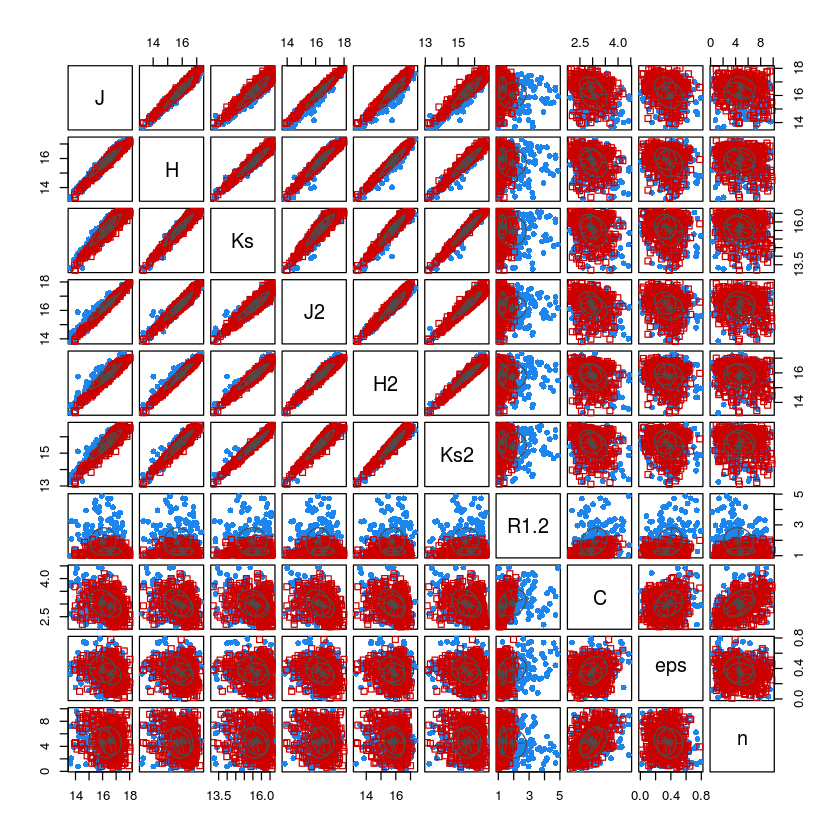

In [11]:
#Hagamos un par de graficos para ver como quedo
plot(mc,what='classification')

In [12]:
#Veamos si alguna de los clusters que encontro el mclust se corresponde con las confirmadas visualmente o las no 
#  confirmadas visualmente.

class <- mc$classification

dat_aux <- data.frame(dat, visual, class)

dat1 <- subset(dat_aux, dat_aux$class == 1)
dat2 <- subset(dat_aux, dat_aux$class == 2)

print('Cluster 1')
table(dat1$visual)
print('Cluster 2')
table(dat2$visual)

[1] "Cluster 1"



False  True 
  184    23 

[1] "Cluster 2"



False  True 
  298    67 

In [15]:
#Probemos ahora con un par mas de componentes

mc <- Mclust(dat, G = 1:5) #Probamos con una mixtura de gaussianas con 5 componentes como maximo
mc$G

[1] 5

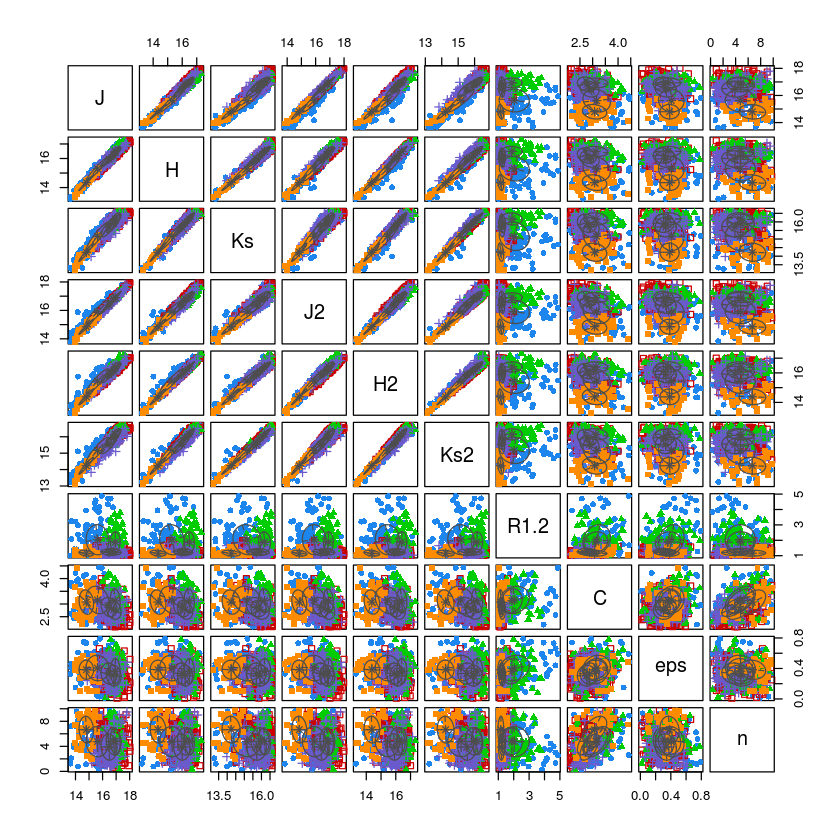

In [14]:
#Hagamos un par de graficos para ver como quedo
plot(mc,what='classification')

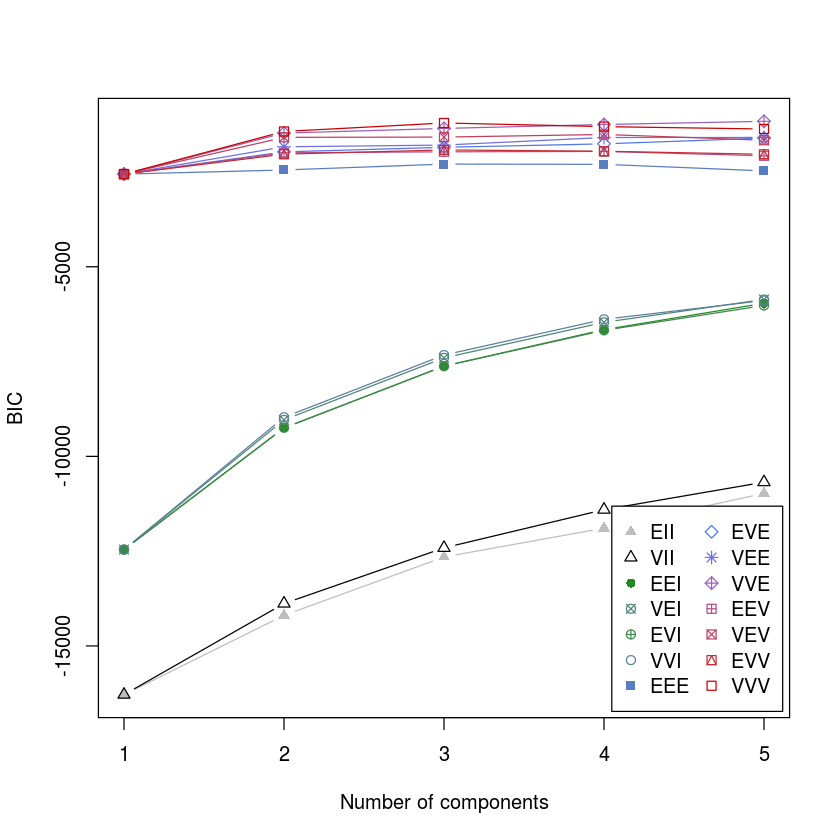

In [16]:
# Grafico del criterio de informacion bayesiano para decidir con que modelo quedarse
plot(mc,what='BIC')

### Conclusiones: 

Si bien el primer algoritmo de clustering encuentra 2 grupos diferentes, ninguno de estos separa las que no fueron confirmadas visualmente de las que si, lo que quiere decir que estas 2 clases son muy similares! 

Cuando le permito probar hasta 5 componentes, encuentra 5 grupos, pero de vuelta ninguno de estos separa las que no fueron confirmadas visualmente de las que si.
Por otro lado en el grafico de BIC se ve que la performance de los modelos no cambia mucho al aumentarle el numero de componentes, lo que significa que es medio ruidoso, que no hay una clara distinción entre estas 5 componentes y que probablemente no haya una distinción física real entre estos clusters.

## Veamos que pasa si le agregamos una columna con la informacion de las bandas Z e Y

In [6]:
#Primero leemos los datos
dat <- read.table('clean_cat2.dat', header = TRUE)
summary(dat)

                       Id            ra             dec               Z        
 VVV-J114419.03-603025.9:  1   Min.   :176.1   Min.   :-64.66   Min.   :13.76  
 VVV-J114428.39-603158.4:  1   1st Qu.:178.2   1st Qu.:-64.30   1st Qu.:16.45  
 VVV-J114431.78-601626.8:  1   Median :205.1   Median :-63.90   Median :17.19  
 VVV-J114433.70-602742.8:  1   Mean   :196.1   Mean   :-62.78   Mean   :17.05  
 VVV-J114450.83-603356.9:  1   3rd Qu.:206.9   3rd Qu.:-60.51   3rd Qu.:17.66  
 VVV-J114453.09-601805.8:  1   Max.   :207.7   Max.   :-59.72   Max.   :19.54  
 (Other)                :566                                    NA's   :241    
       Y               J               H               Ks       
 Min.   :13.93   Min.   :13.63   Min.   :13.22   Min.   :13.18  
 1st Qu.:16.23   1st Qu.:15.86   1st Qu.:15.40   1st Qu.:15.23  
 Median :16.95   Median :16.55   Median :16.07   Median :15.86  
 Mean   :16.76   Mean   :16.36   Mean   :15.86   Mean   :15.63  
 3rd Qu.:17.34   3rd Qu.:17.01   3r

In [7]:
#Guardamos los datos q no vamos a usar para claisificar y los sacamos de la tabla
names <- dat$Id
visual <- dat$visual
ra <- dat$ra
dec <- dat$dec

dat <- dat[,-c(1,2,3,18)]

In [12]:
Z <- vector(length = length(dat$Z)) #Creamos un vector
Z[which(is.na(dat$Z) == TRUE)] = 0
Z[which(is.na(dat$Z) == FALSE)] = 1
dat$Z <- Z #Reasignamos la magnitud Z

Z2 <- vector(length = length(dat$Z2)) #Creamos un vector
Z2[which(is.na(dat$Z2) == TRUE)] = 0
Z2[which(is.na(dat$Z2) == FALSE)] = 1
dat$Z2 <- Z2 #Reasignamos la magnitud Z2

Y <- vector(length = length(dat$Y)) #Creamos un vector
Y[which(is.na(dat$Y) == TRUE)] = 0
Y[which(is.na(dat$Y) == FALSE)] = 1
dat$Y <- Y #Reasignamos la magnitud Y

Y2 <- vector(length = length(dat$Y2)) #Creamos un vector
Y2[which(is.na(dat$Y2) == TRUE)] = 0
Y2[which(is.na(dat$Y2) == FALSE)] = 1
dat$Y2 <- Y2 #Reasignamos la magnitud Y2

In [13]:
#Veamos como quedaron los datos
summary(dat)

       Z                Y                J               H        
 Min.   :0.0000   Min.   :0.0000   Min.   :13.63   Min.   :13.22  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:15.86   1st Qu.:15.40  
 Median :1.0000   Median :1.0000   Median :16.55   Median :16.07  
 Mean   :0.5787   Mean   :0.5787   Mean   :16.36   Mean   :15.86  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:17.01   3rd Qu.:16.50  
 Max.   :1.0000   Max.   :1.0000   Max.   :18.02   Max.   :17.31  
       Ks              Z2               Y2               J2       
 Min.   :13.18   Min.   :0.0000   Min.   :0.0000   Min.   :13.81  
 1st Qu.:15.23   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:15.94  
 Median :15.86   Median :1.0000   Median :1.0000   Median :16.55  
 Mean   :15.63   Mean   :0.5787   Mean   :0.5787   Mean   :16.39  
 3rd Qu.:16.23   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:16.98  
 Max.   :16.65   Max.   :1.0000   Max.   :1.0000   Max.   :17.99  
       H2             Ks2             R1.2             C      

In [19]:
#Hagamos un clustering!

library('mclust') #Cargamos la libreria

mc2 <- Mclust(dat, G = 1:2) #Probamos con una mixtura de gaussianas con 2 componentes como maximo
mc5 <- Mclust(dat, G = 1:5) #Probamos con una mixtura de gaussianas con 5 componentes como maximo

In [20]:
#Hagamos un par de graficos para ver como quedo
mc2$G
mc5$G

[1] 1

[1] 1

Si le agrego informacion sobre las magnitudes z e y (1 si las tiene, 0 sino) me encuentra un solo cluster...

## Veamos que pasa si hacemos clustering con ra y dec!

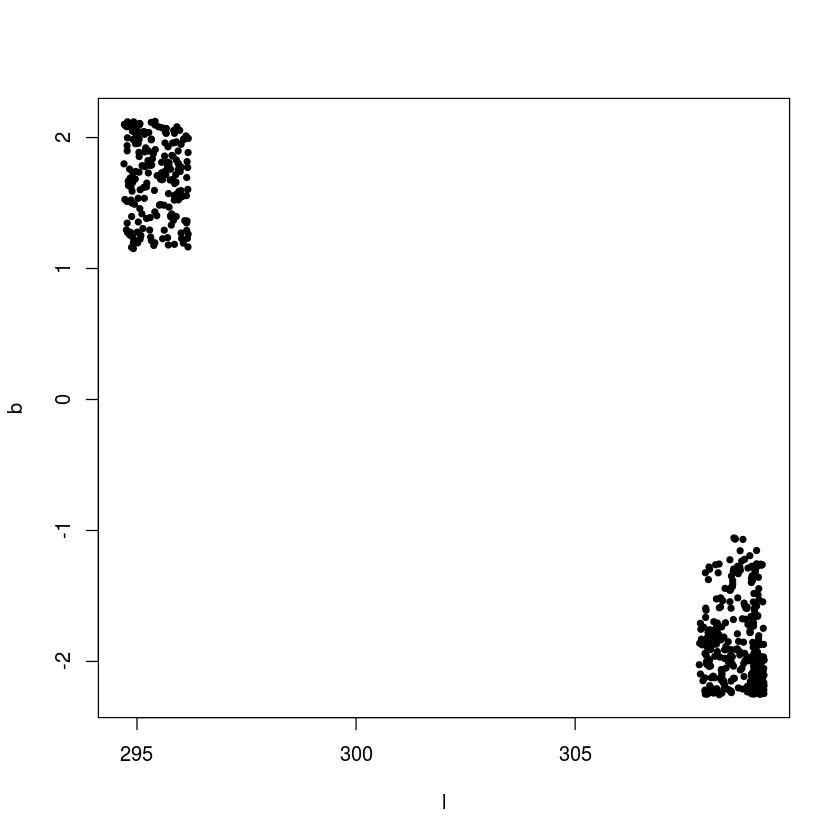

In [4]:
pos <- data.frame(l, b)
plot(pos,pch=20)

In [5]:
#Cortamos por tile por que sino el mclust va a separar los 2 tiles simplemente
tile1 <- subset(pos, pos$l > 300)
tile2 <- subset(pos, pos$l < 300)
length(tile1$l)
length(tile2$l)

[1] 369

[1] 203

In [6]:
library('mclust')
mc1 <- Mclust(tile1, G = 5:15)
mc2 <- Mclust(tile2, G = 5:15)
mc1$G
mc2$G

Package 'mclust' version 5.2.3
Type 'citation("mclust")' for citing this R package in publications.


[1] 6

[1] 6

pdf 
  3

png 
  2

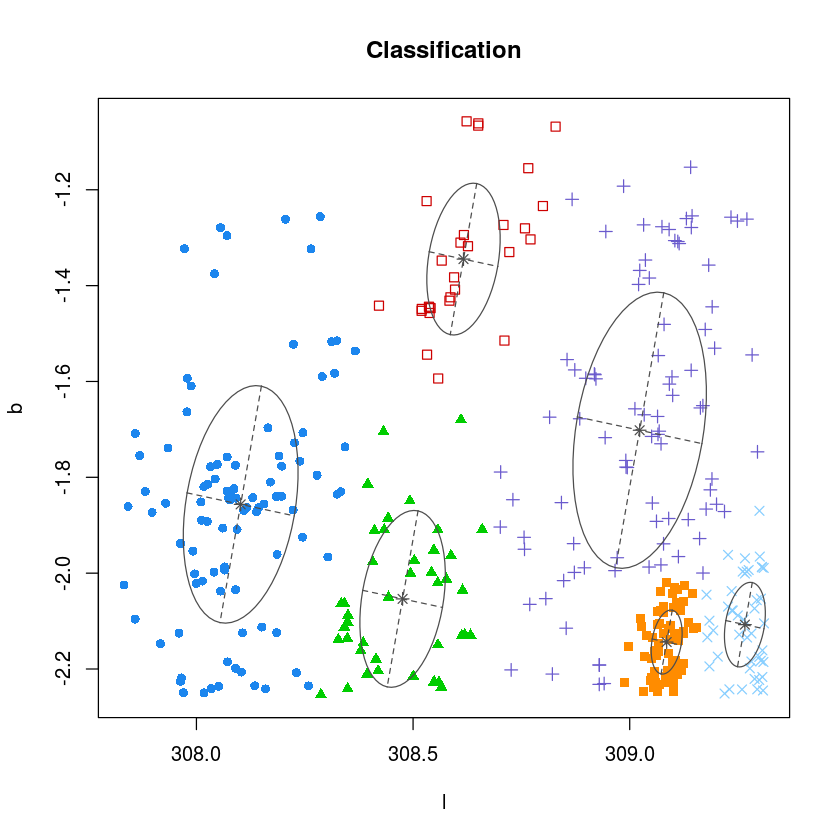

In [7]:
plot(mc1,what='classification')
dev.copy(pdf,'cumulo.pdf')
dev.off()

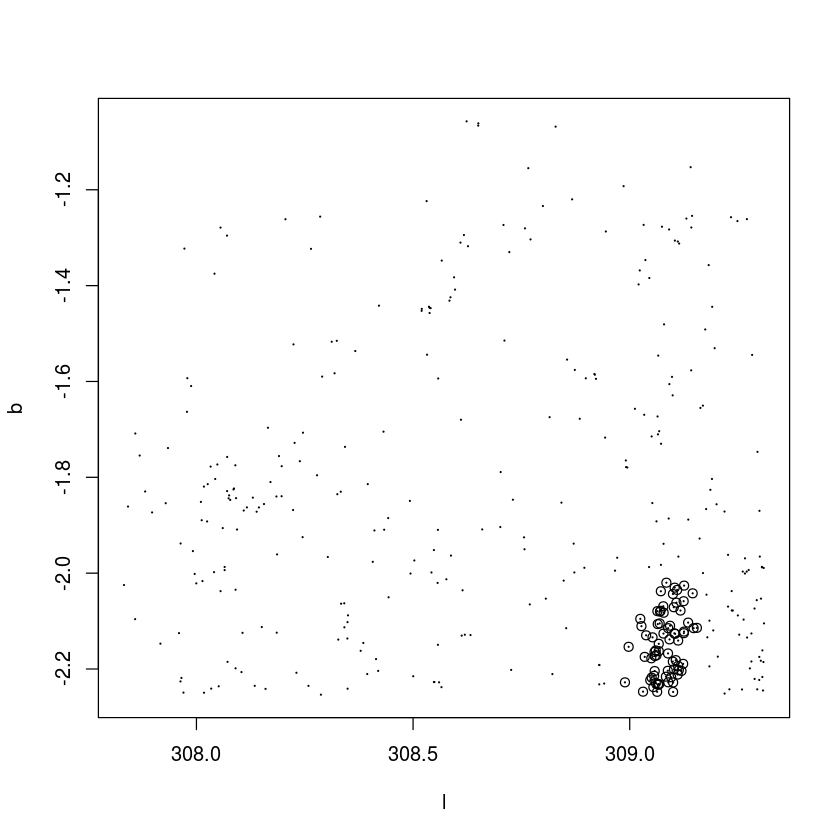

In [13]:
class <- mc1$classification
tile1 <- data.frame(tile1,class)
plot(tile1$l,tile1$b,pch=20,xlab='l',ylab='b', cex=0.1)
#for(i in 1:mc1$G){
    sub <- subset(tile1, tile1$class == 5)
    points(sub$l, sub$b, pch = 1, col = 1)
  #  }

[1] 369

[1] 203

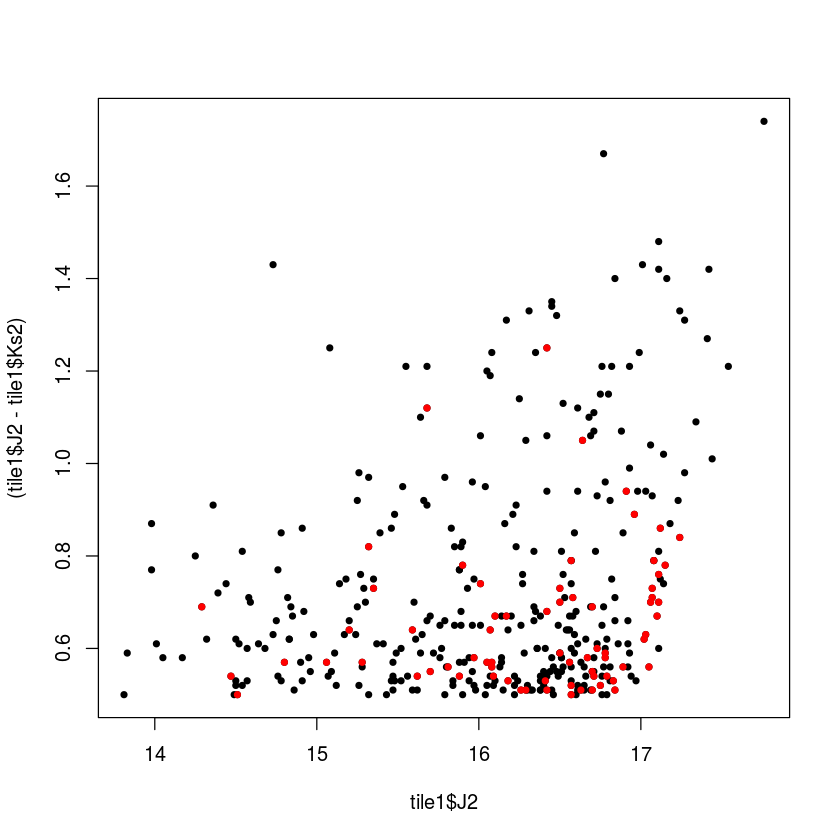

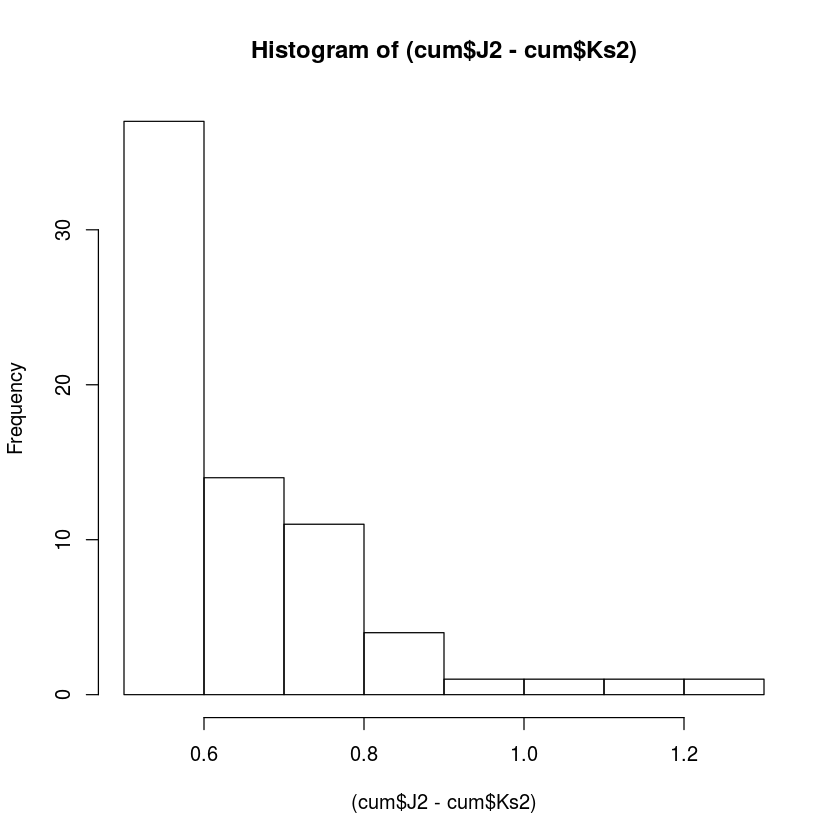

In [25]:
dat <- data.frame(dat, l, b)
tile1 <- subset(dat, dat$l > 300)
tile2 <- subset(dat, dat$l < 300)
length(tile1$l)
length(tile2$l)
tile1 <- data.frame(tile1, class)
cum <- subset(tile1, tile1$class == 5)
plot(tile1$J2, (tile1$J2-tile1$Ks2),pch=20)
points(cum$J2, (cum$J2-cum$Ks2), pch = 20, col = 'red')
hist((cum$J2-cum$Ks2))

In [20]:
mc1$parameters$variance

,l,b
l,0.1903222,0.9817217
b,0.9817217,-0.1903222


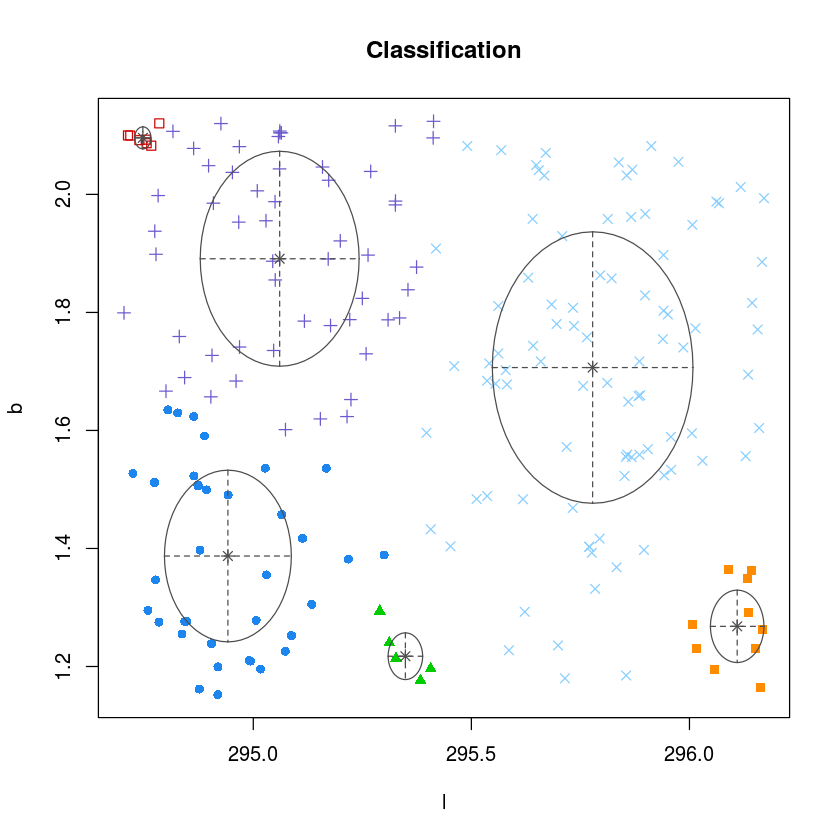

In [21]:
plot(mc2,what='classification')

In [22]:
mc2$parameters$variance

$modelName
[1] "VII"

$d
[1] 2

$G
[1] 6

$sigma
, , 1

          l         b
l 0.0211573 0.0000000
b 0.0000000 0.0211573

, , 2

             l            b
l 0.0003493276 0.0000000000
b 0.0000000000 0.0003493276

, , 3

            l           b
l 0.001564458 0.000000000
b 0.000000000 0.001564458

, , 4

           l          b
l 0.03317719 0.00000000
b 0.00000000 0.03317719

, , 5

            l           b
l 0.003761239 0.000000000
b 0.000000000 0.003761239

, , 6

           l          b
l 0.05290712 0.00000000
b 0.00000000 0.05290712


$sigmasq
[1] 0.0211573011 0.0003493276 0.0015644584 0.0331771862 0.0037612392
[6] 0.0529071185

$scale
[1] 0.0211573011 0.0003493276 0.0015644584 0.0331771862 0.0037612392
[6] 0.0529071185

In [36]:
library('cluster')

In [85]:
gap1 <- clusGap(tile1, K.max = 10, FUNcluster = mclust.gap)

Clustering Gap statistic ["clusGap"].
B=100 simulated reference sets, k = 1..10
 --> Number of clusters (method 'firstSEmax', SE.factor=1): 1
          logW   E.logW         gap     SE.sim
 [1,] 4.775579 4.802621  0.02704270 0.01941468
 [2,] 4.339080 4.309584 -0.02949602 0.04147724
 [3,] 4.037208 4.076581  0.03937295 0.02722477
 [4,] 3.734621 4.035915  0.30129458 0.09431337
 [5,] 3.587780 3.999893  0.41211322 0.10503266
 [6,] 3.472616 3.870350  0.39773424 0.13183658
 [7,] 3.420361 3.765314  0.34495333 0.12512280
 [8,] 3.376494 3.673305  0.29681068 0.13024151
 [9,] 3.346457 3.575516  0.22905866 0.11790111
[10,] 3.298981 3.487119  0.18813743 0.09367948

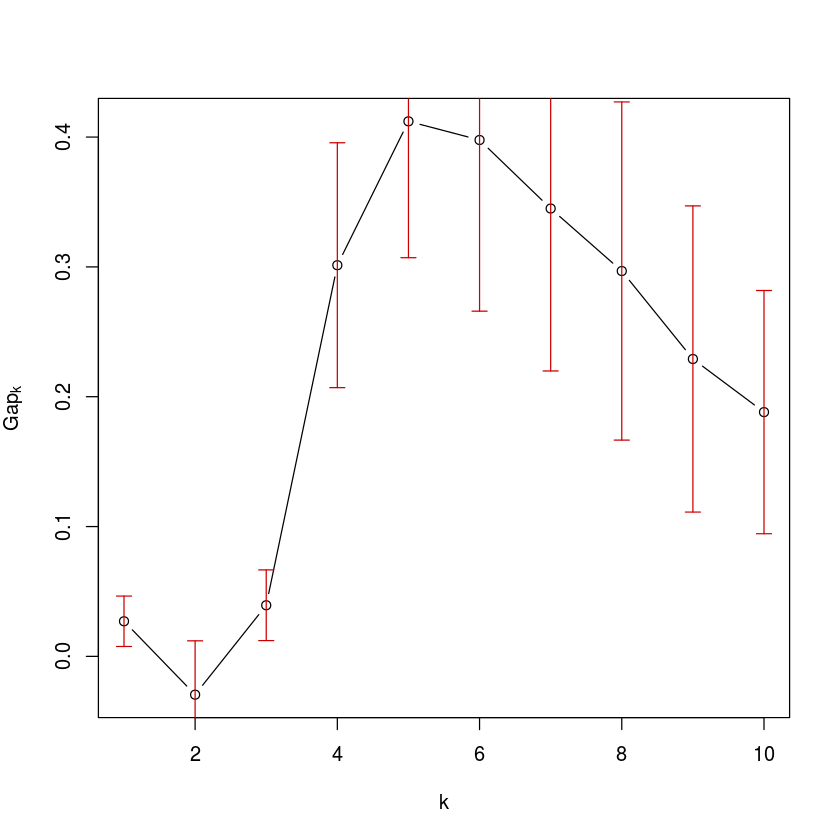

In [86]:
gap1
plot(gap1)

In [83]:
gap2 <- clusGap(tile2, K.max = 10, FUNcluster = mclust.gap)

Clustering Gap statistic ["clusGap"].
B=100 simulated reference sets, k = 1..10
 --> Number of clusters (method 'firstSEmax', SE.factor=1): 2
          logW   E.logW         gap     SE.sim
 [1,] 4.058955 4.045504 -0.01345174 0.02808550
 [2,] 3.457122 3.524709  0.06758739 0.04103635
 [3,] 3.346449 3.292546 -0.05390348 0.06882910
 [4,] 3.241952 3.188887 -0.05306561 0.11126530
 [5,] 3.043804 3.133502  0.08969803 0.11340897
 [6,] 3.131079 3.033145 -0.09793471 0.10448507
 [7,] 2.934606 2.919760 -0.01484562 0.09439486
 [8,] 2.837850 2.810920 -0.02693027 0.08932795
 [9,] 2.828889 2.721300 -0.10758822 0.08949538
[10,] 2.783180 2.642001 -0.14117888 0.07212590

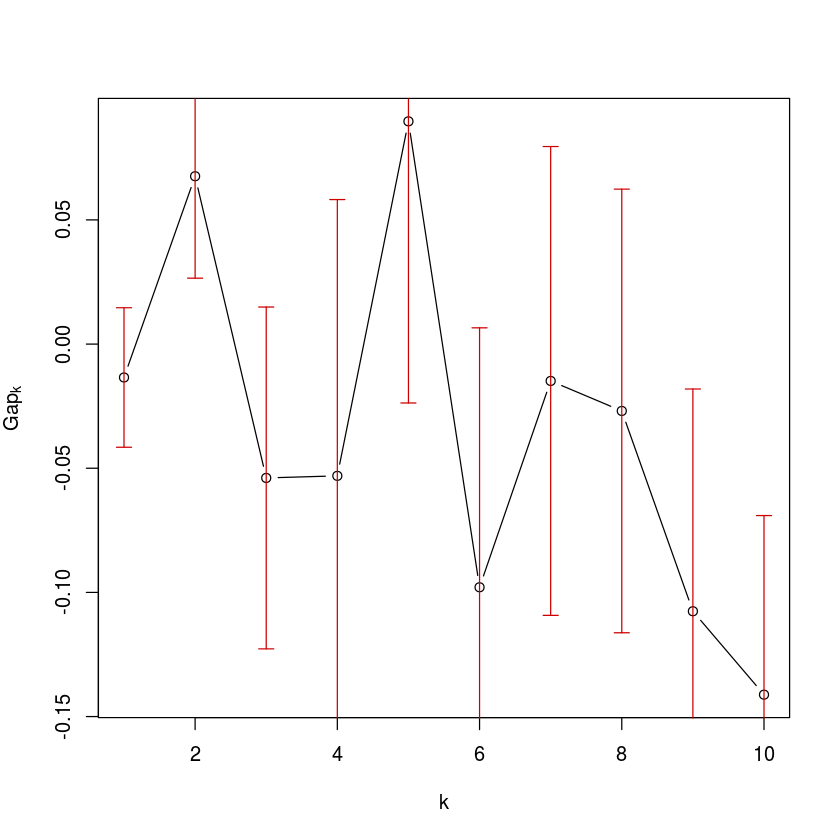

In [84]:
gap2
plot(gap2)

In [81]:
mclust.gap <- function(data, k){
    class <- vector(length = nrow(data))
    class <- as.vector(Mclust(data, G = k)$classification)
    class <- list('cluster' = class)
    return(class)
}